# Pest Classification with Transfer Learning

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import random

# Loading the Data

In [4]:
dataset_path = '../datasets'

# Parameters
batch_size = 32
img_height = 224
img_width = 224
validation_split = 0.2
seed = 123

# Create the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=validation_split,
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Create the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=validation_split,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2711 files belonging to 6 classes.
Using 2169 files for training.
Found 2711 files belonging to 6 classes.
Using 542 files for validation.


# Visualizing Samples from the Dataset

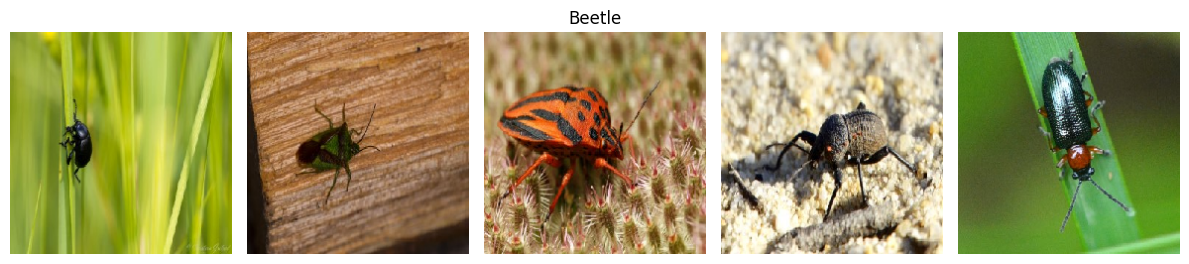

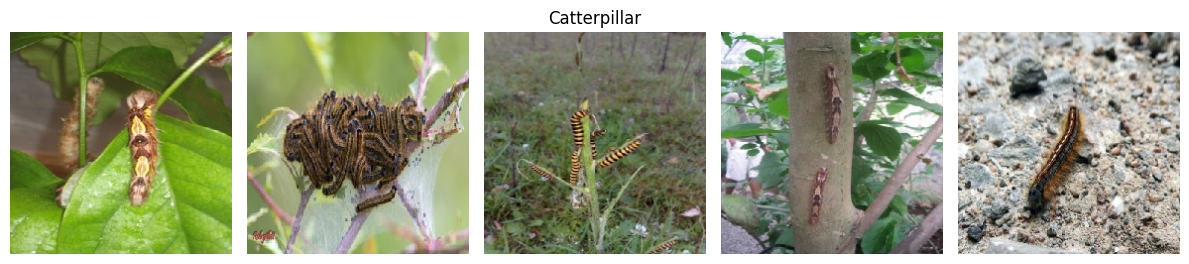

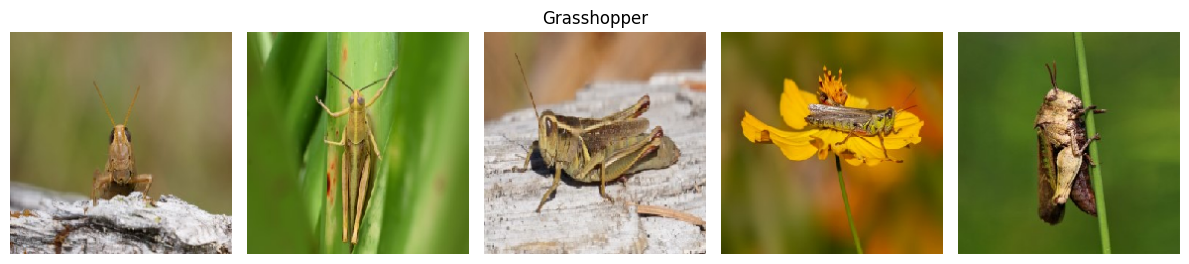

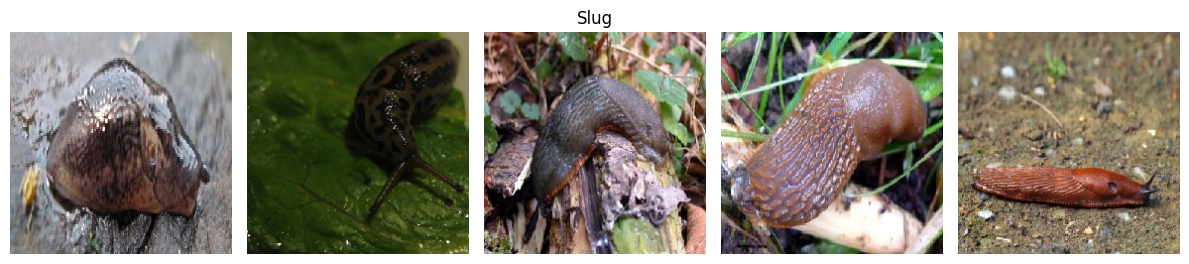

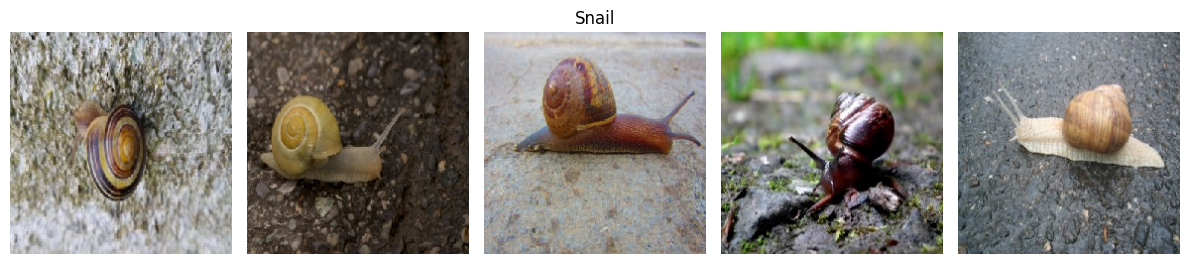

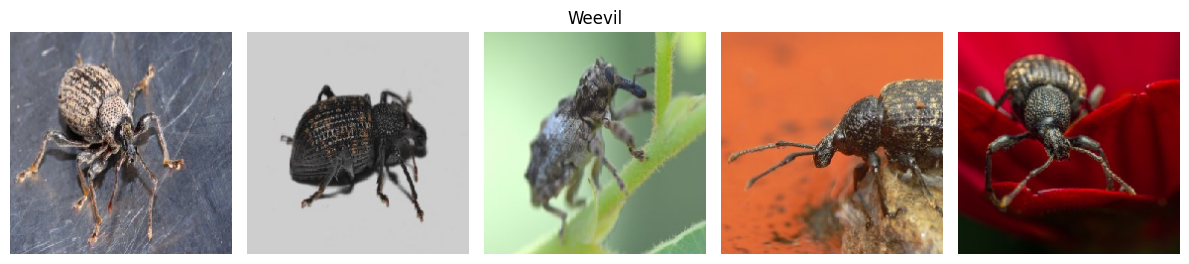

In [7]:
# Loop through each pest subfolder
for folder_name in [i for i in os.listdir(dataset_path)]:
    folder_path = os.path.join(dataset_path, folder_name)

    if os.path.isdir(folder_path):

        # List of images in current folder
        images = [img for img in os.listdir(folder_path)]
        rand_images = random.sample(images, 5)  # Select 5 random images from the folder
        fig, axes = plt.subplots(1, 5, figsize=(12, 6))
        for i, img_name in enumerate(rand_images):
            img_path = os.path.join(folder_path, img_name)
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
            ax = axes[i]
            if i == 2:
                ax.set_title(folder_name.title())  # Centralized title
            ax.imshow(img)
            ax.axis('off')  # Turn of ticks and labels
        plt.tight_layout()
        # plt.savefig(f'../images/{folder_name}_prev.png')
        plt.show()